# Fashion MNIST

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
tf.random.set_seed(1234)

## DNN 구조

### 일반적인 DNN

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


In [4]:
train_X = train_X / 255.0
test_X = test_X / 255.0

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_X, train_Y, epochs=40, validation_split=0.25)

Epoch 1/40
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5345 - accuracy: 0.8146 - val_loss: 0.4304 - val_accuracy: 0.8485
Epoch 2/40
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3908 - accuracy: 0.8602 - val_loss: 0.3790 - val_accuracy: 0.8634
Epoch 3/40
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3505 - accuracy: 0.8728 - val_loss: 0.3670 - val_accuracy: 0.8674
Epoch 4/40
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3240 - accuracy: 0.8803 - val_loss: 0.3451 - val_accuracy: 0.8762
Epoch 5/40
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.8881 - val_loss: 0.3422 - val_accuracy: 0.8758
Epoch 6/40
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2884 - accuracy: 0.8928 - val_loss: 0.3347 - val_accuracy: 0.8821
Epoch 7/40
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2732 - accuracy: 0.8984 - val_loss: 0.3482 - val_accuracy:

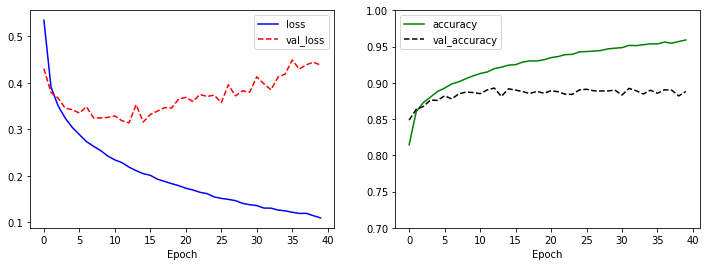

313/313 [==============================] - 1s 2ms/step - loss: 0.4681 - accuracy: 0.8859


[0.46806615591049194, 0.8859000205993652]

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)

### BatchNormal + Multi Layers

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)              

In [9]:
history = model.fit(train_X, train_Y, epochs=40, validation_split=0.25)

Epoch 1/40
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5542 - accuracy: 0.8095 - val_loss: 0.5028 - val_accuracy: 0.8203
Epoch 2/40
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4193 - accuracy: 0.8480 - val_loss: 0.4213 - val_accuracy: 0.8434
Epoch 3/40
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3768 - accuracy: 0.8623 - val_loss: 0.4185 - val_accuracy: 0.8489
Epoch 4/40
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3465 - accuracy: 0.8729 - val_loss: 0.4099 - val_accuracy: 0.8501
Epoch 5/40
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3282 - accuracy: 0.8797 - val_loss: 0.3598 - val_accuracy: 0.8695
Epoch 6/40
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3137 - accuracy: 0.8836 - val_loss: 0.3612 - val_accuracy: 0.8711
Epoch 7/40
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2973 - accuracy: 0.8891 - val_loss: 0.4051 - val_accuracy:

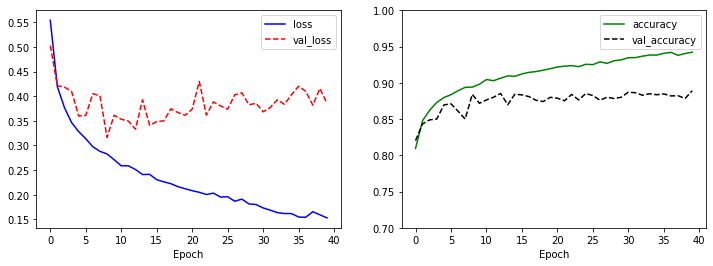

313/313 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.8862


[0.42781034111976624, 0.8862000107765198]

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)

## CNN 구조

### 구조적인 부분

#### 단순 Conv Layer들로만 사용하는 구조

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X/255
test_X = test_X/255

In [12]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [13]:
train_X = train_X.reshape(-1, 28,28,1) # (60000,28,28) -->(60000,28,28,1)
test_X = test_X.reshape(-1, 28,28,1) ## (10000,28,28)--> (10000, 28, 28,1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [14]:
model = tf.keras.Sequential([
    # 입력레이어 + 처음 conv레이어 설계로...특징들추출..
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    # 분류 NN을 하기 위해서 평탄화작업...
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    # 출력단을 설계.....분류가 10개 종류...
    tf.keras.layers.Dense(units=10, activation="softmax")
])
# 그 구조에 대한 파라미터 어떻게...
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

In [15]:
history = model.fit(train_X, train_Y, epochs=40, validation_split=0.25)

Epoch 1/40
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4679 - accuracy: 0.8331 - val_loss: 0.3912 - val_accuracy: 0.8591
Epoch 2/40
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3392 - accuracy: 0.8760 - val_loss: 0.3878 - val_accuracy: 0.8667
Epoch 3/40
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2883 - accuracy: 0.8940 - val_loss: 0.4008 - val_accuracy: 0.8658
Epoch 4/40
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2436 - accuracy: 0.9092 - val_loss: 0.4024 - val_accuracy: 0.8705
Epoch 5/40
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2100 - accuracy: 0.9218 - val_loss: 0.4180 - val_accuracy: 0.8735
Epoch 6/40
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1869 - accuracy: 0.9307 - val_loss: 0.4614 - val_accuracy: 0.8723
Epoch 7/40
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1680 - accuracy: 0.9385 - val_loss: 0.4898 - val_ac

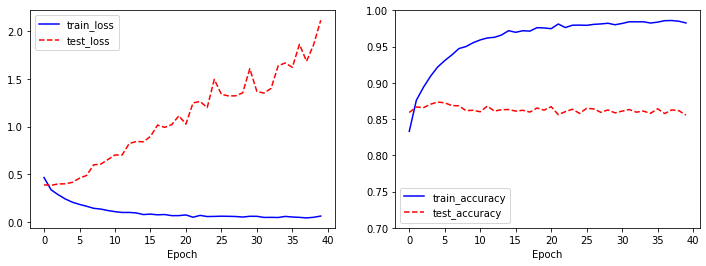

313/313 [==============================] - 1s 4ms/step - loss: 2.0857 - accuracy: 0.8509


[2.085719585418701, 0.8508999943733215]

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r--", label="test_loss")
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r--", label="test_accuracy")
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

model.evaluate(test_X, test_Y)

#### Conv + Pooling + Dropout 구조

In [17]:
model = tf.keras.Sequential([
    # 입력레이어 + 처음 conv레이어 설계로...특징들추출..
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16, padding="same"),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    # 분류 NN을 하기 위해서 평탄화작업...
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    # 출력단을 설계.....분류가 10개 종류...
    tf.keras.layers.Dense(units=10, activation="softmax")
])
# 그 구조에 대한 파라미터 어떻게...
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [18]:
history = model.fit(train_X, train_Y, epochs=40, validation_split=0.25)


Epoch 1/40
1407/1407 [==============================] - 8s 5ms/step - loss: 0.4801 - accuracy: 0.8251 - val_loss: 0.3464 - val_accuracy: 0.8725
Epoch 2/40
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3321 - accuracy: 0.8812 - val_loss: 0.2958 - val_accuracy: 0.8905
Epoch 3/40
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2883 - accuracy: 0.8941 - val_loss: 0.2934 - val_accuracy: 0.8903
Epoch 4/40
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2601 - accuracy: 0.9054 - val_loss: 0.2874 - val_accuracy: 0.8969
Epoch 5/40
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2388 - accuracy: 0.9119 - val_loss: 0.2928 - val_accuracy: 0.8950
Epoch 6/40
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2196 - accuracy: 0.9204 - val_loss: 0.2748 - val_accuracy: 0.9066
Epoch 7/40
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2064 - accuracy: 0.9220 - val_loss: 0.3045 - val_accuracy:

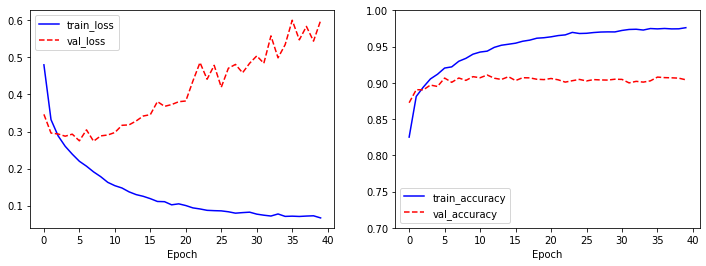

313/313 [==============================] - 1s 3ms/step - loss: 0.6479 - accuracy: 0.8987


[0.6478920578956604, 0.8986999988555908]

In [19]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r--", label="val_accuracy")
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()
plt.show()

model.evaluate(test_X, test_Y)

#### VGG-16 구조 차용

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=32, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])

# Adam, sparse-cate-crossentro, accuracy
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [21]:
history = model.fit(train_X, train_Y, epochs=40, validation_split=0.25)

Epoch 1/40
1407/1407 [==============================] - 23s 16ms/step - loss: 0.5898 - accuracy: 0.7836 - val_loss: 0.3281 - val_accuracy: 0.8806
Epoch 2/40
1407/1407 [==============================] - 23s 16ms/step - loss: 0.3748 - accuracy: 0.8651 - val_loss: 0.2704 - val_accuracy: 0.9001
Epoch 3/40
1407/1407 [==============================] - 23s 16ms/step - loss: 0.3250 - accuracy: 0.8829 - val_loss: 0.3011 - val_accuracy: 0.8867
Epoch 4/40
1407/1407 [==============================] - 23s 16ms/step - loss: 0.3019 - accuracy: 0.8909 - val_loss: 0.2385 - val_accuracy: 0.9132
Epoch 5/40
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2884 - accuracy: 0.8971 - val_loss: 0.2245 - val_accuracy: 0.9163
Epoch 6/40
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2777 - accuracy: 0.8993 - val_loss: 0.2330 - val_accuracy: 0.9175
Epoch 7/40
1407/1407 [==============================] - 23s 17ms/step - loss: 0.2703 - accuracy: 0.9022 - val_loss: 0.2432 -

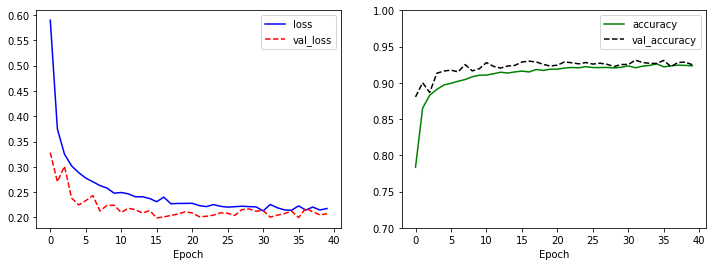

[0.21783240139484406, 0.9214000105857849]

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

#### VGG-16 + BatchNormal 구조 추가

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=32, padding="same", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"), 
    
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding="valid", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])

# Adam, sparse-cate-crossentro, accuracy
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)       

In [24]:
history = model.fit(train_X, train_Y, epochs=40, validation_split=0.25)

Epoch 1/40
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9516 - accuracy: 0.7030 - val_loss: 0.4614 - val_accuracy: 0.8341
Epoch 2/40
1407/1407 [==============================] - 27s 19ms/step - loss: 0.5386 - accuracy: 0.8083 - val_loss: 0.4014 - val_accuracy: 0.8552
Epoch 3/40
1407/1407 [==============================] - 27s 19ms/step - loss: 0.4645 - accuracy: 0.8394 - val_loss: 0.3714 - val_accuracy: 0.8779
Epoch 4/40
1407/1407 [==============================] - 27s 19ms/step - loss: 0.4274 - accuracy: 0.8513 - val_loss: 0.3217 - val_accuracy: 0.8867
Epoch 5/40
1407/1407 [==============================] - 27s 19ms/step - loss: 0.4067 - accuracy: 0.8618 - val_loss: 0.3304 - val_accuracy: 0.8837
Epoch 6/40
1407/1407 [==============================] - 27s 19ms/step - loss: 0.3812 - accuracy: 0.8714 - val_loss: 0.2923 - val_accuracy: 0.9022
Epoch 7/40
1407/1407 [==============================] - 27s 19ms/step - loss: 0.3595 - accuracy: 0.8796 - val_loss: 0.2947 -

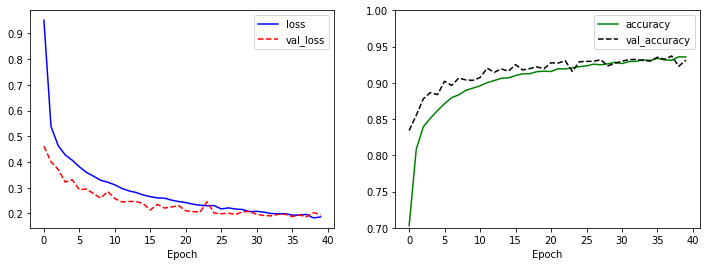

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


### Data  증가

In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X/255
test_X = test_X/255

In [27]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [28]:
train_X = train_X.reshape(-1, 28,28,1) # (60000,28,28) -->(60000,28,28,1)
test_X = test_X.reshape(-1, 28,28,1) ## (10000,28,28)--> (10000, 28, 28,1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [30]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range=0.5,
    horizontal_flip= True,
    vertical_flip= False
)

# 훈련 데이터의 50%인 약 3만장 세팅
augment_size = 60000

# 변형할 3만장의 대상 랜덤 선택
randidx = np.random.randint(train_X.shape[0], size=augment_size)


x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                  batch_size=augment_size,
                                  shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
# pandas의 concate와 유사함..
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(120000, 28, 28, 1)


#### VGG-16의 기본 응용구조(위에 한 부분)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=32, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])

# Adam, sparse-cate-crossentro, accuracy
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)        

In [32]:
history = model.fit(train_X, train_Y, epochs=40, validation_split=0.25)

Epoch 1/40
2813/2813 [==============================] - 46s 16ms/step - loss: 0.6024 - accuracy: 0.7772 - val_loss: 0.4638 - val_accuracy: 0.8224
Epoch 2/40
2813/2813 [==============================] - 45s 16ms/step - loss: 0.4135 - accuracy: 0.8490 - val_loss: 0.3929 - val_accuracy: 0.8529
Epoch 3/40
2813/2813 [==============================] - 45s 16ms/step - loss: 0.3707 - accuracy: 0.8677 - val_loss: 0.3623 - val_accuracy: 0.8665
Epoch 4/40
2813/2813 [==============================] - 45s 16ms/step - loss: 0.3492 - accuracy: 0.8739 - val_loss: 0.3414 - val_accuracy: 0.8710
Epoch 5/40
2813/2813 [==============================] - 45s 16ms/step - loss: 0.3340 - accuracy: 0.8796 - val_loss: 0.3704 - val_accuracy: 0.8684
Epoch 6/40
2813/2813 [==============================] - 45s 16ms/step - loss: 0.3247 - accuracy: 0.8838 - val_loss: 0.3355 - val_accuracy: 0.8730
Epoch 7/40
2813/2813 [==============================] - 46s 16ms/step - loss: 0.3208 - accuracy: 0.8846 - val_loss: 0.3422 -

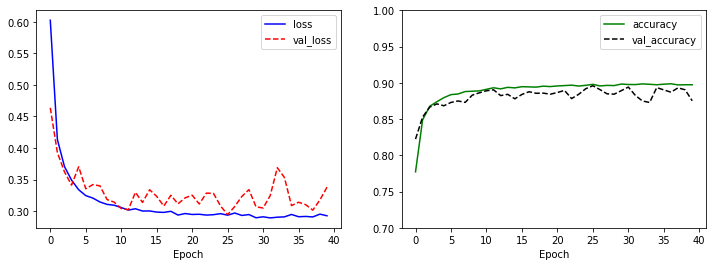

[0.22563283145427704, 0.9176999926567078]

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

#### VGG-16 + BatchNormal

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3), filters=32, padding="same", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"), 
    
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding="same", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding="valid", activation="relu"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])

# Adam, sparse-cate-crossentro, accuracy
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)       

In [38]:
history = model.fit(train_X, train_Y, epochs=100, validation_split=0.25)

Epoch 1/100
2813/2813 [==============================] - 53s 19ms/step - loss: 0.8898 - accuracy: 0.7022 - val_loss: 0.6432 - val_accuracy: 0.7718
Epoch 2/100
2813/2813 [==============================] - 53s 19ms/step - loss: 0.5595 - accuracy: 0.8016 - val_loss: 0.5356 - val_accuracy: 0.8237
Epoch 3/100
2813/2813 [==============================] - 52s 19ms/step - loss: 0.4902 - accuracy: 0.8308 - val_loss: 0.4693 - val_accuracy: 0.8339
Epoch 4/100
2813/2813 [==============================] - 52s 19ms/step - loss: 0.4542 - accuracy: 0.8448 - val_loss: 0.4073 - val_accuracy: 0.8573
Epoch 5/100
2813/2813 [==============================] - 53s 19ms/step - loss: 0.4157 - accuracy: 0.8581 - val_loss: 0.4124 - val_accuracy: 0.8590
Epoch 6/100
2813/2813 [==============================] - 52s 19ms/step - loss: 0.3918 - accuracy: 0.8659 - val_loss: 0.3915 - val_accuracy: 0.8638
Epoch 7/100
2813/2813 [==============================] - 53s 19ms/step - loss: 0.3685 - accuracy: 0.8725 - val_loss: 0

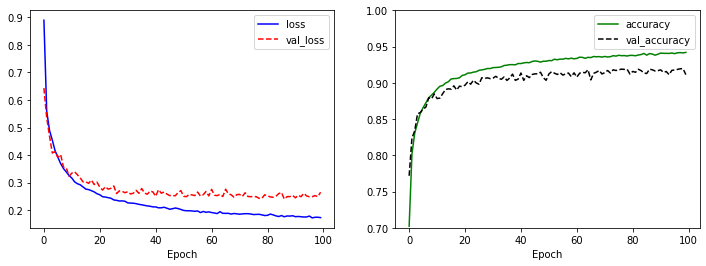

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()



plt.show()
